<a href="https://colab.research.google.com/github/kathleenreily/russian-bank-defaults/blob/master/Russian_bank_defaults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Purpose:

Predict the bankruptsy of Russian financial institutions between 2008 and 2014 using multiple modeling techniques including Random Forest and Deep Learning supervised learning, as well as unsupervised modeling strategies such as GMM and K Means clustering. 

Introduction:

Using multiple algorithmic strategies I will evaluate a dataset titled 'bank defaults in Russia - a dataset on bank's P&L, macroeconomics and bank's defaults in Russia between 2008 and 2014'. I will be determining which modeling approach performs with the highest level of explanatory power, and therefore predicting best which banks are most likely to default and declare bankruptsy. 

Data:

I extracted my dataset from [Kaggle](https://www.kaggle.com/johnds2/bankdefaultsinrussia), the banking profit and loss as well as macroeconomic data was gathered from open data commons website and also directly from public records directly from the banks that defaulted. After cleaning, all variables in the dataset are float, there are 72,439 observations and 32 features. 



In [117]:
import pandas as pd #descriptive stats-manipulating df
from scipy import stats

import numpy as np #data distribution
import matplotlib.pyplot as plt
%matplotlib inline

import math #ttest and A/B test-cleaning missing values-data cleaning outliers
import numpy as np
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from scipy.stats.stats import ttest_ind

from scipy.stats.mstats import winsorize #data exploration 

from scipy.stats import jarque_bera #feature engineering (upload bera and normal each time of use)
from scipy.stats import normaltest
from scipy.stats import boxcox

import math #dimensionality and pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt #linear regression and OLS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import statsmodels.api as sm
%matplotlib inline

from statsmodels.tsa.stattools import acf #meeting assumptions of linear regression
from scipy.stats import bartlett
from scipy.stats import levene

from sklearn.model_selection import train_test_split #making predictions
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

from sklearn.metrics import mean_absolute_error  #overfitting and regularization
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

from sklearn.model_selection import GridSearchCV #supervised learning
from scipy.stats import randint as sp_randint

from sklearn.svm import SVC #support vector model
from sklearn import ensemble #ensemble modeling such as boost and random forest
from sklearn import tree
from IPython.display import Image
import itertools
#import pydotplus #visualizing the decision tree
#import graphviz

import statsmodels.formula.api as smf #meeting assumptions of the model
from sklearn import neighbors #knn regression model

from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier


from matplotlib import pyplot
from pandas import DataFrame

from sklearn.cluster import KMeans #unsupervised models
from sklearn.cluster import MiniBatchKMeans

from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

from sklearn.cluster import DBSCAN #dbscan model

from matplotlib.patches import Ellipse #gmm model
from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE #dimensionality reduction with t-sne
import time

!pip install umap-learn #dimensionality reduction with UMAP
import time
import umap

import datetime as dt #time series model
from datetime import datetime
from statsmodels.tsa.stattools import pacf 
from statsmodels.tsa.arima_model import ARIMA #ARIMA model

#deep learning model packages already satisfied in anaconda scipy and umap

from sklearn.linear_model import Ridge #additional linear regression models
from sklearn.linear_model import ElasticNet
from sklearn import tree

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

!pip install tensorflow==2.0.0-rc1 #deep learning

import pandas as pd
from tensorflow.keras.models import Sequential 

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense

%matplotlib inline


In [172]:
#upload data

from google.colab import drive
drive.mount('/content/drive')

russbank_df = pd.read_csv('/content/drive/My Drive/DS projects and datasets/russian_bank_defaults.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
russbank_df

,лицензия,дата,net_assets,ROA,liquid,ibl,stocks,bond,oth_cap,sunk_retail_credit,NI,organization_credit,sunk_organization_credit,credit_portf,sunk_credit_portf,organization_deposit,retail_deposit,security_tot,ROE,retail_credit,reserv_credit_perc,zalog_credit_perc,foreign_na_fr,retail_deposit_fr,N3,N2,N1,capital,msk_spb,INF_SA,NX_growth,micex_std,miacr_std,miacr_amount,usd_rub_std_diff,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff,default
0,0.0,2010-02-01,423017.0,27.0,112770.0,60000.0,0.0,0.0,0.0,0.0,102.0,225000.0,0.0,232150.0,0.0,95828.0,61007.0,0.0,54.0,7150.0,1094.0,10409.0,2075.0,482234.0,0.0,9915.0,2058.0,227962.0,0.0,0.020000,2728.0,29.75618,0.724981,2643995.0,1.081969,0.000000,-156425.0,1595305.0,47521.0,33587.30532,214757.0,0.00,0.008065,-0.830116,0.0
1,0.0,2010-03-01,498411.0,75.0,172628.0,90000.0,0.0,0.0,0.0,0.0,569.0,225000.0,0.0,232140.0,0.0,156131.0,83773.0,0.0,150.0,7140.0,1094.0,10409.0,2075.0,482234.0,0.0,9915.0,2058.0,228552.0,0.0,0.027475,-980.0,40.07545,0.330918,2643995.0,-0.527030,-0.057148,225429.0,-265831.0,-34392.0,22186.02349,59909.0,-0.10,0.010699,-0.172562,0.0
2,0.0,2010-04-01,571220.0,54.0,211860.0,90000.0,0.0,0.0,0.0,997.0,651.0,227287.0,0.0,1704838.5,997.0,244427.0,29306.0,0.0,114.0,36868.0,1094.0,10409.0,2075.0,482234.0,0.0,9915.0,2058.0,228565.0,0.0,0.024986,-299.0,23.77384,0.359785,2643995.0,0.345271,0.043424,-128438.0,430871.0,-21876.0,-14983.52885,4293.0,0.10,-0.019848,-0.296650,0.0
3,0.0,2010-05-01,523027.0,41.0,159970.0,90000.0,0.0,0.0,0.0,481.0,677.0,227130.0,0.0,236631.0,481.0,200250.0,37288.0,29977.0,89.0,9501.0,1094.0,10409.0,2075.0,482234.0,0.0,9915.0,2058.0,228582.0,0.0,0.021233,-767.0,25.82706,0.246044,2643995.0,-0.334974,0.048447,-223667.0,92737.0,-1075.0,-19523.94108,64243.0,-0.10,-0.012387,-0.255000,0.0
4,0.0,2010-06-01,473713.0,31.0,131782.0,135000.0,0.0,0.0,0.0,485.0,644.0,191306.0,0.0,200546.0,485.0,223835.0,29394.0,0.0,68.0,9240.0,1094.0,10409.0,2075.0,482234.0,0.0,9915.0,2058.0,227896.0,0.0,0.032372,-1736.0,53.69817,0.137915,2643995.0,2.929403,-0.105536,251702.0,-134963.0,81.0,-20743.43746,36008.0,0.10,0.042533,-0.533087,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72434,3481.0,2013-06-01,182761.0,-2052.0,107151.0,0.0,0.0,60466.0,0.0,0.0,-21879.0,13104.0,0.0,13104.0,0.0,0.0,0.0,0.0,-3678.0,228696.0,0.0,0.0,2845.0,0.0,0.0,0.0,4775.0,104247.0,1.0,0.012699,-4934.0,17.19233,0.146387,4049329.0,-0.569301,0.037472,1544072.0,-279237.0,72341.0,51129.01800,991300.0,-0.28,0.031083,-0.161429,0.0
72435,3481.0,2013-07-01,187081.0,-1452.0,112244.0,0.0,0.0,0.0,0.0,0.0,-17716.0,13116.0,0.0,13116.0,0.0,0.0,0.0,0.0,-2592.0,228696.0,0.0,0.0,1103.0,0.0,0.0,0.0,4922.0,108583.0,1.0,-0.002499,2834.0,23.53189,0.178494,4489255.0,0.132877,0.015922,337380.0,-236336.0,-179020.0,40901.43189,544068.0,-0.46,-0.001339,-0.411097,0.0
72436,3481.0,2013-08-01,187668.0,-1229.0,113628.0,0.0,0.0,0.0,0.0,0.0,-16912.0,13104.0,0.0,13104.0,0.0,0.0,0.0,0.0,-2187.0,228696.0,0.0,0.0,165.0,0.0,0.0,0.0,4752.0,106739.0,1.0,0.007439,3591.0,24.64386,0.304343,4946024.0,-0.328852,0.041928,-462042.0,101793.0,386806.0,85155.85633,275036.0,-0.38,-0.031336,-0.162712,0.0
72437,3481.0,2013-09-01,181299.0,-1218.0,108015.0,0.0,0.0,0.0,0.0,0.0,-18640.0,13104.0,0.0,13104.0,0.0,0.0,0.0,0.0,-2163.0,228696.0,0.0,0.0,0.0,0.0,0.0,0.0,4693.0,105208.0,1.0,0.012192,-277.0,16.94659,0.156308,4859773.0,-0.310335,0.015858,-283925.0,-233050.0,25341.0,72254.16137,-296898.0,0.15,-0.000808,-0.330628,0.0


In [119]:
russbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72439 entries, 0 to 72438
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   лицензия                     70483 non-null  float64
 1   дата                         70483 non-null  object 
 2   net_assets                   72439 non-null  float64
 3   ROA                          72439 non-null  float64
 4   liquid                       72439 non-null  float64
 5   ibl                          72439 non-null  float64
 6   stocks                       72439 non-null  float64
 7   bond                         72439 non-null  float64
 8   oth_cap                      72439 non-null  float64
 9   sunk_retail_credit           72439 non-null  float64
 10  NI                           72439 non-null  float64
 11  organization_credit          72439 non-null  float64
 12  sunk_organization_credit     72439 non-null  float64
 13  credit_portf    

Data Cleaning: Let's rename a few of our columns for readability and drop a few that don't add to the objective of this project. 


> Rename



In [173]:
russbank_df = russbank_df.rename(columns={'дата': 'date', 'ibl': 'interest bearing liability'})



> Drop unnecessary features, particularly those with only 0 values



In [174]:
russbank_df = russbank_df.drop(['лицензия', 'stocks', 'bond', 'oth_cap', 'sunk_retail_credit', 'sunk_organization_credit',
                                'sunk_credit_portf', 'security_tot', 'N3', 'msk_spb', 'default'], axis = 1)

There are 72,439 observations and 44 features

In [122]:
print(russbank_df.shape)

(72439, 34)


Cleaning Phase:

Let's first make sure we have all the necessary individual values using the unique function, particularly focussing on our target variable for the first modeling stage, linear regression-supervised modeling

In [175]:
russbank_df['net_assets'].unique()

array([423017., 498411., 571220., ..., 187668., 181299., 177523.])



> we see all unique variables 



Check for missing values in our dataset

In [152]:
total_missing = russbank_df.isnull().sum().sort_values(ascending=False)
percent_missing = (russbank_df.isnull().sum()/russbank_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
date,1956,0.027002
organization_deposit,0,0.000000
foreign_na_fr,0,0.000000
zalog_credit_perc,0,0.000000
reserv_credit_perc,0,0.000000
retail_credit,0,0.000000
ROE,0,0.000000
retail_deposit,0,0.000000
credit_portf,0,0.000000
usd_rub_return,0,0.000000


The only variable missing observations is date, however the percentage is only 2% so I will not attend to the missing values

First apply PCA for dimensionality reduction then check for outliers in our dataset


> First change the format of time so we can perform pca



In [176]:
russbank_df['date'] = pd.DatetimeIndex(russbank_df['date']).year

russbank_df

,date,net_assets,ROA,liquid,interest bearing liability,NI,organization_credit,credit_portf,organization_deposit,retail_deposit,ROE,retail_credit,reserv_credit_perc,zalog_credit_perc,foreign_na_fr,retail_deposit_fr,N2,N1,capital,INF_SA,NX_growth,micex_std,miacr_std,miacr_amount,usd_rub_std_diff,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff
0,2010.0,423017.0,27.0,112770.0,60000.0,102.0,225000.0,232150.0,95828.0,61007.0,54.0,7150.0,1094.0,10409.0,2075.0,482234.0,9915.0,2058.0,227962.0,0.020000,2728.0,29.75618,0.724981,2643995.0,1.081969,0.000000,-156425.0,1595305.0,47521.0,33587.30532,214757.0,0.00,0.008065,-0.830116
1,2010.0,498411.0,75.0,172628.0,90000.0,569.0,225000.0,232140.0,156131.0,83773.0,150.0,7140.0,1094.0,10409.0,2075.0,482234.0,9915.0,2058.0,228552.0,0.027475,-980.0,40.07545,0.330918,2643995.0,-0.527030,-0.057148,225429.0,-265831.0,-34392.0,22186.02349,59909.0,-0.10,0.010699,-0.172562
2,2010.0,571220.0,54.0,211860.0,90000.0,651.0,227287.0,1704838.5,244427.0,29306.0,114.0,36868.0,1094.0,10409.0,2075.0,482234.0,9915.0,2058.0,228565.0,0.024986,-299.0,23.77384,0.359785,2643995.0,0.345271,0.043424,-128438.0,430871.0,-21876.0,-14983.52885,4293.0,0.10,-0.019848,-0.296650
3,2010.0,523027.0,41.0,159970.0,90000.0,677.0,227130.0,236631.0,200250.0,37288.0,89.0,9501.0,1094.0,10409.0,2075.0,482234.0,9915.0,2058.0,228582.0,0.021233,-767.0,25.82706,0.246044,2643995.0,-0.334974,0.048447,-223667.0,92737.0,-1075.0,-19523.94108,64243.0,-0.10,-0.012387,-0.255000
4,2010.0,473713.0,31.0,131782.0,135000.0,644.0,191306.0,200546.0,223835.0,29394.0,68.0,9240.0,1094.0,10409.0,2075.0,482234.0,9915.0,2058.0,227896.0,0.032372,-1736.0,53.69817,0.137915,2643995.0,2.929403,-0.105536,251702.0,-134963.0,81.0,-20743.43746,36008.0,0.10,0.042533,-0.533087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72434,2013.0,182761.0,-2052.0,107151.0,0.0,-21879.0,13104.0,13104.0,0.0,0.0,-3678.0,228696.0,0.0,0.0,2845.0,0.0,0.0,4775.0,104247.0,0.012699,-4934.0,17.19233,0.146387,4049329.0,-0.569301,0.037472,1544072.0,-279237.0,72341.0,51129.01800,991300.0,-0.28,0.031083,-0.161429
72435,2013.0,187081.0,-1452.0,112244.0,0.0,-17716.0,13116.0,13116.0,0.0,0.0,-2592.0,228696.0,0.0,0.0,1103.0,0.0,0.0,4922.0,108583.0,-0.002499,2834.0,23.53189,0.178494,4489255.0,0.132877,0.015922,337380.0,-236336.0,-179020.0,40901.43189,544068.0,-0.46,-0.001339,-0.411097
72436,2013.0,187668.0,-1229.0,113628.0,0.0,-16912.0,13104.0,13104.0,0.0,0.0,-2187.0,228696.0,0.0,0.0,165.0,0.0,0.0,4752.0,106739.0,0.007439,3591.0,24.64386,0.304343,4946024.0,-0.328852,0.041928,-462042.0,101793.0,386806.0,85155.85633,275036.0,-0.38,-0.031336,-0.162712
72437,2013.0,181299.0,-1218.0,108015.0,0.0,-18640.0,13104.0,13104.0,0.0,0.0,-2163.0,228696.0,0.0,0.0,0.0,0.0,0.0,4693.0,105208.0,0.012192,-277.0,16.94659,0.156308,4859773.0,-0.310335,0.015858,-283925.0,-233050.0,25341.0,72254.16137,-296898.0,0.15,-0.000808,-0.330628




> Fill any NaN values with the feature's mean value



In [177]:
russbank_df = russbank_df.fillna(russbank_df.mean())

In [155]:
russbank_df.isnull().sum()

date                           0
net_assets                     0
ROA                            0
liquid                         0
interest bearing liability     0
NI                             0
organization_credit            0
credit_portf                   0
organization_deposit           0
retail_deposit                 0
ROE                            0
retail_credit                  0
reserv_credit_perc             0
zalog_credit_perc              0
foreign_na_fr                  0
retail_deposit_fr              0
N2                             0
N1                             0
capital                        0
INF_SA                         0
NX_growth                      0
micex_std                      0
miacr_std                      0
miacr_amount                   0
usd_rub_std_diff               0
micex_return                   0
net_foreign_assets_diff        0
net_gov_debt_diff              0
other_fin_debt_diff            0
retail_debt_SA_DETREND_diff    0
stocks_cap



> Apply pca to the entire dataset prior to cleaning and feature evaluation phase



In [178]:
pca = PCA(n_components=2).fit_transform(russbank_df) 

Index(['net_assets', 'ROA', 'liquid', 'interest bearing liability', 'NI',
       'organization_credit', 'credit_portf', 'organization_deposit',
       'retail_deposit', 'ROE', 'retail_credit', 'reserv_credit_perc',
       'zalog_credit_perc', 'foreign_na_fr', 'retail_deposit_fr', 'N2', 'N1',
       'capital', 'INF_SA', 'NX_growth', 'micex_std', 'miacr_std',
       'miacr_amount', 'usd_rub_std_diff', 'micex_return',
       'net_foreign_assets_diff', 'net_gov_debt_diff', 'other_fin_debt_diff',
       'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
       'i_retail_spread_diff', 'usd_rub_return', 'miacr_diff'],
      dtype='object')


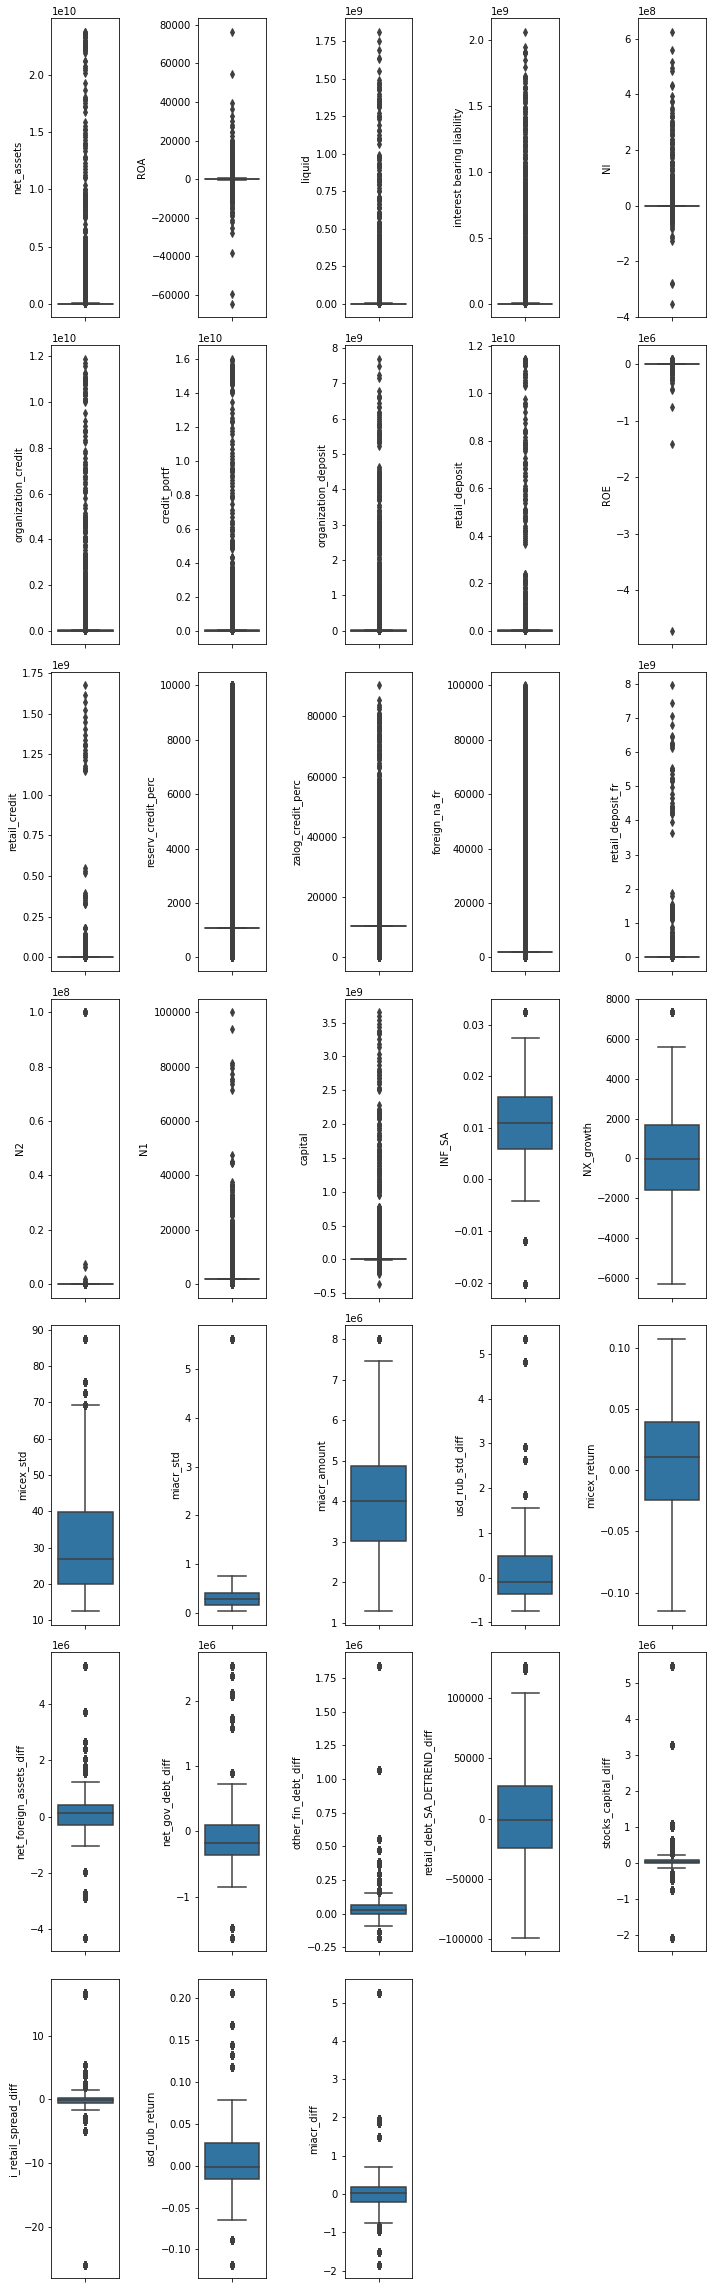

In [179]:
cl = russbank_df.columns
cl= cl[1:45]

plt.figure(figsize = (10,50)) 
print(cl)
for i, column in enumerate(russbank_df[cl]): 
  plt.subplot(11, 5, i + 1) 
  sns.boxplot(x=column, data=russbank_df[cl], orient = 'v')

plt.tight_layout()

There are 27 variables with significant outliers, I will treat the mild outliers with winsorization, and the more severe outliers by logging.

In [170]:
#logged target variable
#russbank_df['log_net_asset'] = np.log(russbank_df["net_assets"])

In [180]:
#Winsorization
russbank_df['winsorized_n2'] = winsorize(russbank_df["N2"], (0.20, 0))
russbank_df['winsorized_inf_sa'] = winsorize(russbank_df['INF_SA'], (0.20, 0.20))
russbank_df['winsorized_micex'] = winsorize(russbank_df['micex_std'], (0.20, 0.))
russbank_df['winsorized_usd_rub'] = winsorize(russbank_df['usd_rub_std_diff'], (0.20, 0.))
russbank_df['winsorized_foreign_ass'] = winsorize(russbank_df['net_foreign_assets_diff'], (0.20, 0.20))
russbank_df['winsorized_net_gov_debt'] = winsorize(russbank_df['net_gov_debt_diff'], (0.10, 0.))
russbank_df['winsorized_other_findebt'] = winsorize(russbank_df['other_fin_debt_diff'], (0.20, 0.20))
russbank_df['winsorized_net_gov_debt'] = winsorize(russbank_df['stocks_capital_diff'], (0.20, 0.20))
russbank_df['winsorized_retail_spreaddiff'] = winsorize(russbank_df['i_retail_spread_diff'], (0.20, 0.20))
russbank_df['winsorized_usdrub_return'] = winsorize(russbank_df['usd_rub_return'], (0.20, 0.20))
russbank_df['winsorized_miacre_diff'] = winsorize(russbank_df['miacr_diff'], (0.20, 0.20))

#logged to winsorized variables
russbank_df["wins_net_asset"] = winsorize(russbank_df["net_assets"], (0.30, 0.30))
russbank_df["wins_ROA"] = winsorize(russbank_df["ROA"], (0.30, 0.30))
russbank_df["wins_ibl"] = winsorize(russbank_df["interest bearing liability"], (0.30, 0.30))
russbank_df["wins_NI"] = winsorize(russbank_df["NI"], (0.30, 0.30))
russbank_df["wins_org_cred"] = winsorize(russbank_df['organization_credit'], (0.30, 0.30))
russbank_df["wins_cred_port"] = winsorize(russbank_df['credit_portf'], (0.30, 0.30))
russbank_df["wins_org_deposit"] = winsorize(russbank_df['organization_deposit'], (0.30, 0.30))
russbank_df["wins_retail_deposit"] = winsorize(russbank_df['retail_deposit'], (0.30, 0.30))
russbank_df["wins_ROE"] = winsorize(russbank_df['ROE'], (0.30, 0.30))
russbank_df["wins_retail_cred"] = winsorize(russbank_df['retail_credit'], (0.30, 0.30))
russbank_df["wins_reserve_cred"] = winsorize(russbank_df['reserv_credit_perc'], (0.30, 0.30))
russbank_df["wins_zalog_credit"] = winsorize(russbank_df['zalog_credit_perc'], (0.30, 0.30))
russbank_df["wins_foreign_nafr"] = winsorize(russbank_df['foreign_na_fr'], (0.30, 0.30))
russbank_df["wins_retail_depfr"] = winsorize(russbank_df['retail_deposit_fr'], (0.30, 0.30))
russbank_df["wins_n1"] = winsorize(russbank_df['N1'], (0.30, 0.30))
russbank_df["wins_capital"] = winsorize(russbank_df['capital'], (0.30, 0.30))


In [131]:
russbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72439 entries, 0 to 72438
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          72439 non-null  float64
 1   net_assets                    72439 non-null  float64
 2   ROA                           72439 non-null  float64
 3   liquid                        72439 non-null  float64
 4   interest bearing liability    72439 non-null  float64
 5   NI                            72439 non-null  float64
 6   organization_credit           72439 non-null  float64
 7   credit_portf                  72439 non-null  float64
 8   organization_deposit          72439 non-null  float64
 9   retail_deposit                72439 non-null  float64
 10  ROE                           72439 non-null  float64
 11  retail_credit                 72439 non-null  float64
 12  reserv_credit_perc            72439 non-null  float64
 13  z

Let's check that all the outliers were dealt with

Index(['usd_rub_return', 'miacr_diff', 'winsorized_n2', 'winsorized_inf_sa',
       'winsorized_micex', 'winsorized_usd_rub', 'winsorized_foreign_ass',
       'winsorized_net_gov_debt', 'winsorized_other_findebt',
       'winsorized_retail_spreaddiff', 'winsorized_usdrub_return',
       'winsorized_miacre_diff', 'wins_net_asset', 'wins_ROA', 'wins_ibl',
       'wins_NI', 'wins_org_cred', 'wins_cred_port', 'wins_org_deposit',
       'wins_retail_deposit', 'wins_ROE', 'wins_retail_cred',
       'wins_reserve_cred', 'wins_zalog_credit', 'wins_foreign_nafr',
       'wins_retail_depfr', 'wins_n1', 'wins_capital'],
      dtype='object')


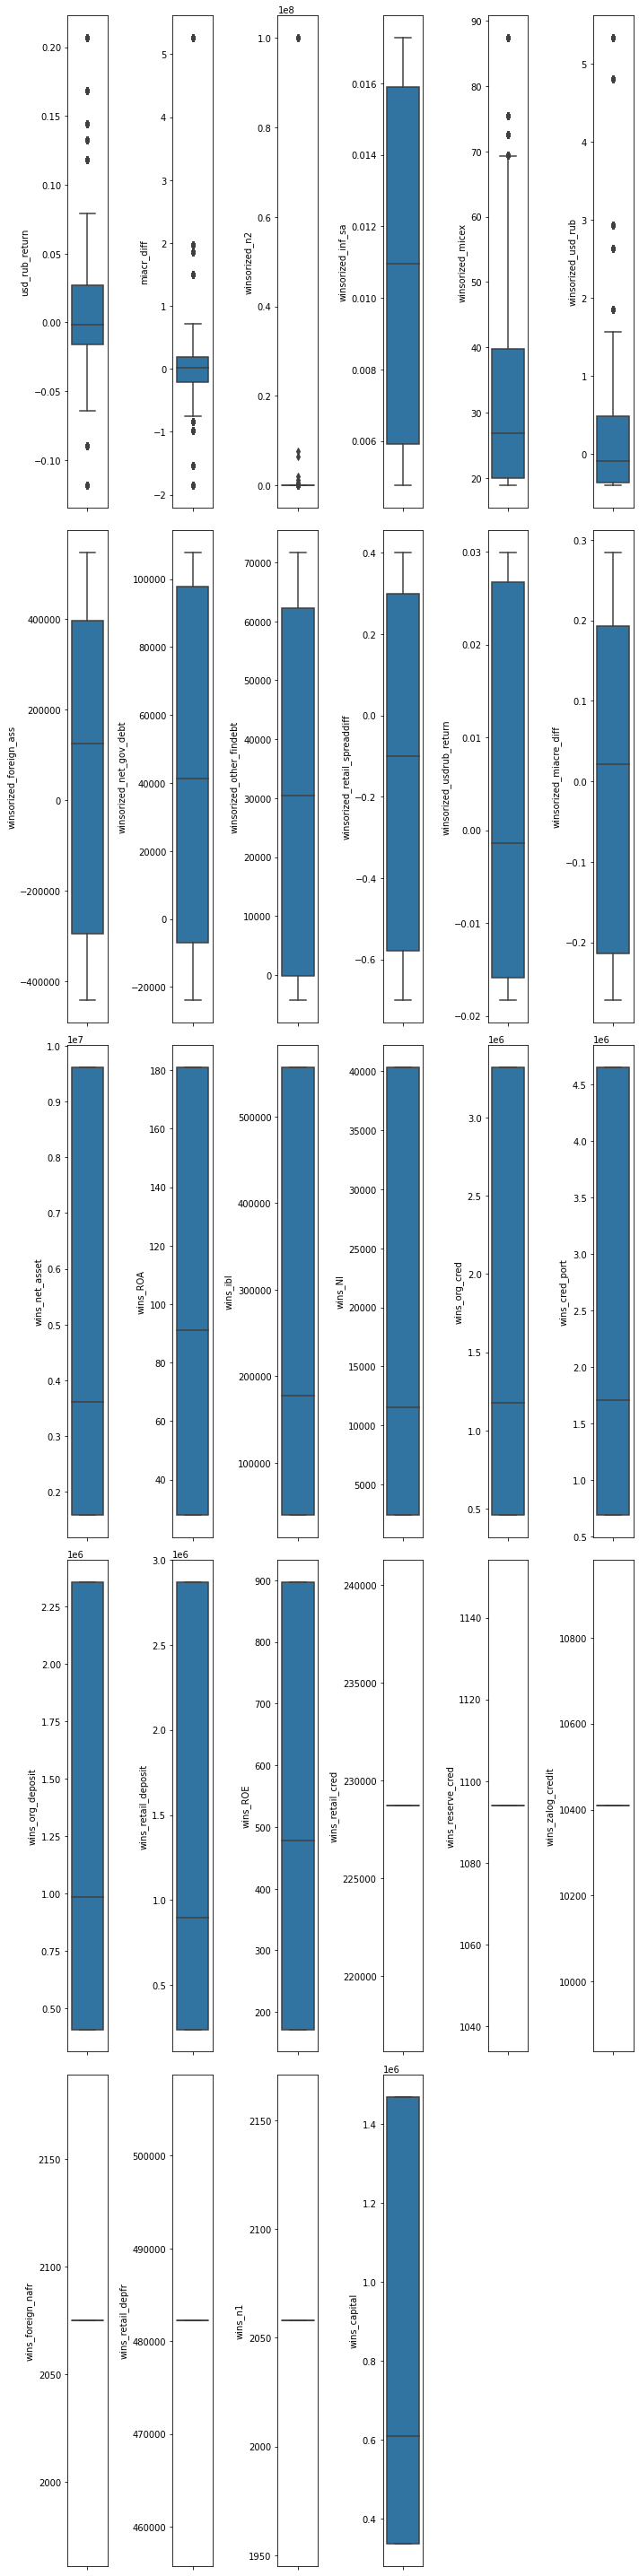

In [181]:
cl = russbank_df.columns
cl= cl[32:60]

plt.figure(figsize = (10,40)) 
print(cl)
for i, column in enumerate(russbank_df[cl]): 
  plt.subplot(5, 6, i + 1) 
  sns.boxplot(x=column, data=russbank_df[cl], orient = 'v')

plt.tight_layout()

All of our logged variables had copious outliers so i performed winsorization on them instead. 

Once applying winsorization method to all the variables i found almost all the outliers had been handled with the exception of a few residuals which i will leave alone, and also with the exception of our target variable net assets. ***



> Drop all the original features from the df that were winsorized



In [183]:
cl = russbank_df.columns
cl= cl[1:34]

print(cl)

Index(['net_assets', 'ROA', 'liquid', 'interest bearing liability', 'NI',
       'organization_credit', 'credit_portf', 'organization_deposit',
       'retail_deposit', 'ROE', 'retail_credit', 'reserv_credit_perc',
       'zalog_credit_perc', 'foreign_na_fr', 'retail_deposit_fr', 'N2', 'N1',
       'capital', 'INF_SA', 'NX_growth', 'micex_std', 'miacr_std',
       'miacr_amount', 'usd_rub_std_diff', 'micex_return',
       'net_foreign_assets_diff', 'net_gov_debt_diff', 'other_fin_debt_diff',
       'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
       'i_retail_spread_diff', 'usd_rub_return', 'miacr_diff'],
      dtype='object')


In [184]:
russbank_df = russbank_df.drop(['ROA', 'liquid', 'interest bearing liability',
                                'NI', 'net_assets', 'organization_credit', 'credit_portf', 'organization_deposit',
                                'retail_deposit', 'ROE', 'retail_credit', 'reserv_credit_perc',
                                'zalog_credit_perc', 'foreign_na_fr', 'retail_deposit_fr',
                                'N2', 'N1', 'capital', 'micex_std', 'usd_rub_std_diff', 'net_foreign_assets_diff',
                                'net_gov_debt_diff', 'other_fin_debt_diff',
       'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
       'i_retail_spread_diff', 'INF_SA', 'usd_rub_return', 'miacr_diff'], axis = 1)

In [136]:
russbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72439 entries, 0 to 72438
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          72439 non-null  float64
 1   NX_growth                     72439 non-null  float64
 2   miacr_std                     72439 non-null  float64
 3   miacr_amount                  72439 non-null  float64
 4   micex_return                  72439 non-null  float64
 5   log_net_asset                 72439 non-null  float64
 6   winsorized_n2                 72439 non-null  float64
 7   winsorized_inf_sa             72439 non-null  float64
 8   winsorized_micex              72439 non-null  float64
 9   winsorized_usd_rub            72439 non-null  float64
 10  winsorized_foreign_ass        72439 non-null  float64
 11  winsorized_net_gov_debt       72439 non-null  float64
 12  winsorized_other_findebt      72439 non-null  float64
 13  w

In [137]:
russbank_df

,date,NX_growth,miacr_std,miacr_amount,micex_return,log_net_asset,winsorized_n2,winsorized_inf_sa,winsorized_micex,winsorized_usd_rub,winsorized_foreign_ass,winsorized_net_gov_debt,winsorized_other_findebt,winsorized_retail_spreaddiff,winsorized_usdrub_return,winsorized_miacre_diff,wins_ROA,wins_ibl,wins_NI,wins_org_cred,wins_cred_port,wins_org_deposit,wins_retail_deposit,wins_ROE,wins_retail_cred,wins_reserve_cred,wins_zalog_credit,wins_foreign_nafr,wins_retail_depfr,wins_n1,wins_capital
0,2010.0,2728.0,0.724981,2643995.0,0.000000,12.955168,9915.0,0.017265,29.75618,1.081969,-156425.0,107781.0,47521.0,0.00,0.008065,-0.271561,28.0,60000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
1,2010.0,-980.0,0.330918,2643995.0,-0.057148,13.119180,9915.0,0.017265,40.07545,-0.404925,225429.0,59909.0,-4233.0,-0.10,0.010699,-0.172562,75.0,90000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
2,2010.0,-299.0,0.359785,2643995.0,0.043424,13.255530,9915.0,0.017265,23.77384,0.345271,-128438.0,4293.0,-4233.0,0.10,-0.018288,-0.271561,54.0,90000.0,2433.0,460816.0,1704838.5,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
3,2010.0,-767.0,0.246044,2643995.0,0.048447,13.167388,9915.0,0.017265,25.82706,-0.334974,-223667.0,64243.0,-1075.0,-0.10,-0.012387,-0.255000,41.0,90000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
4,2010.0,-1736.0,0.137915,2643995.0,-0.105536,13.068357,9915.0,0.017265,53.69817,2.929403,251702.0,36008.0,81.0,0.10,0.029888,-0.271561,31.0,135000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72434,2013.0,-4934.0,0.146387,4049329.0,0.037472,12.115935,9915.0,0.012699,18.88642,-0.404925,547276.0,107781.0,71646.0,-0.28,0.029888,-0.161429,28.0,40000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
72435,2013.0,2834.0,0.178494,4489255.0,0.015922,12.139297,9915.0,0.004761,23.53189,0.132877,337380.0,107781.0,-4233.0,-0.46,-0.001339,-0.271561,28.0,40000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
72436,2013.0,3591.0,0.304343,4946024.0,0.041928,12.142430,9915.0,0.007439,24.64386,-0.328852,-441720.0,107781.0,71646.0,-0.38,-0.018288,-0.162712,28.0,40000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0
72437,2013.0,-277.0,0.156308,4859773.0,0.015858,12.107903,9915.0,0.012192,18.88642,-0.310335,-283925.0,-23844.0,25341.0,0.15,-0.000808,-0.271561,28.0,40000.0,2433.0,460816.0,694936.0,406925.0,239488.0,172.0,228696.0,1094.0,10409.0,2075.0,482234.0,2058.0,336730.0


Feature Exploration Phase


> Let's start by looking at the distribution of our target variable net assets.



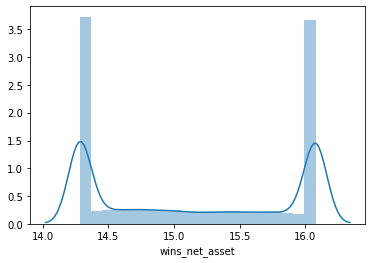

In [185]:
ax = sns.distplot(np.log(russbank_df["wins_net_asset"]+1))

We can see this is not normally distributed but we will normalize our data before we begin the modeling phase later.



> Let's look at our desriptive stats for a few specific variables of interest



In [186]:
russbank_df["wins_net_asset"].describe()

count    7.243900e+04
mean     5.061101e+06
std      3.462354e+06
min      1.590572e+06
25%      1.590572e+06
50%      3.617370e+06
75%      9.614327e+06
max      9.614327e+06
Name: wins_net_asset, dtype: float64

In [140]:
russbank_df["wins_n1"].describe()

count    72439.0
mean      2058.0
std          0.0
min       2058.0
25%       2058.0
50%       2058.0
75%       2058.0
max       2058.0
Name: wins_n1, dtype: float64

We can see a min/max and a mean for net assets of near 0, and we can see can see a mean, and a min/max of 2,058 for net loss



> Let's now create a correltion matrix and a heatmap in order to evaluate the relationship between the target and our features. 



In [187]:
russbank_df.corr()

,date,NX_growth,miacr_std,miacr_amount,micex_return,winsorized_n2,winsorized_inf_sa,winsorized_micex,winsorized_usd_rub,winsorized_foreign_ass,winsorized_net_gov_debt,winsorized_other_findebt,winsorized_retail_spreaddiff,winsorized_usdrub_return,winsorized_miacre_diff,wins_net_asset,wins_ROA,wins_ibl,wins_NI,wins_org_cred,wins_cred_port,wins_org_deposit,wins_retail_deposit,wins_ROE,wins_retail_cred,wins_reserve_cred,wins_zalog_credit,wins_foreign_nafr,wins_retail_depfr,wins_n1,wins_capital
date,1.000000,-0.001171,-0.003311,0.015504,0.005445,-0.005706,-0.006332,0.000344,-0.004099,-0.003224,-0.008815,0.006201,0.002117,-0.008490,-0.026275,-0.019773,-0.001938,-0.002248,-0.018645,-0.032644,-0.027457,-0.014769,-0.019940,-0.004187,NaN,NaN,NaN,NaN,NaN,NaN,-0.019442
NX_growth,-0.001171,1.000000,0.033356,0.015309,-0.083365,0.003296,-0.002893,0.108151,0.059333,-0.076732,0.032453,-0.061557,0.042124,-0.018039,0.134007,-0.004883,0.004277,0.008174,0.031912,-0.008177,-0.007750,0.001624,0.005067,0.001668,NaN,NaN,NaN,NaN,NaN,NaN,-0.006587
miacr_std,-0.003311,0.033356,1.000000,0.311646,-0.116750,-0.003191,-0.163107,0.274386,0.147937,0.172165,-0.176003,0.177961,0.137185,0.196102,0.172333,-0.009483,0.024406,-0.029938,0.067201,-0.007604,-0.006838,-0.008064,-0.006297,-0.010452,NaN,NaN,NaN,NaN,NaN,NaN,-0.008193
miacr_amount,0.015504,0.015309,0.311646,1.000000,0.032132,0.014259,-0.287438,0.109322,0.047433,0.230938,-0.135767,0.365158,-0.062908,0.247598,-0.008729,0.068655,-0.033718,0.081647,0.094835,0.046879,0.064482,0.019796,0.054110,-0.047852,NaN,NaN,NaN,NaN,NaN,NaN,0.081095
micex_return,0.005445,-0.083365,-0.116750,0.032132,1.000000,0.006556,-0.158620,-0.343575,-0.237597,-0.186102,0.117739,0.043876,-0.087761,-0.387420,-0.223085,0.012428,0.001813,0.015019,0.002405,0.006601,0.002213,0.006676,0.005778,-0.000039,NaN,NaN,NaN,NaN,NaN,NaN,0.013949
winsorized_n2,-0.005706,0.003296,-0.003191,0.014259,0.006556,1.000000,-0.009612,0.000005,-0.000992,-0.001936,-0.004919,0.005038,-0.001298,-0.004202,-0.011044,0.010971,0.010376,0.009711,0.012922,0.003105,-0.001660,0.012126,-0.014831,0.006529,NaN,NaN,NaN,NaN,NaN,NaN,0.020317
winsorized_inf_sa,-0.006332,-0.002893,-0.163107,-0.287438,-0.158620,-0.009612,1.000000,0.003471,-0.060672,0.074990,0.021048,-0.199957,0.172239,0.093353,0.075933,-0.034144,0.000831,-0.023508,-0.033056,-0.022677,-0.040223,-0.000879,-0.022898,0.006176,NaN,NaN,NaN,NaN,NaN,NaN,-0.045729
winsorized_micex,0.000344,0.108151,0.274386,0.109322,-0.343575,0.000005,0.003471,1.000000,0.236627,0.226863,-0.159202,0.188313,0.145558,0.237866,0.251880,-0.005980,0.007001,-0.018134,-0.000986,-0.004154,-0.000137,-0.008544,0.003917,-0.007735,NaN,NaN,NaN,NaN,NaN,NaN,-0.004553
winsorized_usd_rub,-0.004099,0.059333,0.147937,0.047433,-0.237597,-0.000992,-0.060672,0.236627,1.000000,0.107567,-0.142100,-0.011693,0.201021,0.243075,0.116799,-0.000236,0.005286,-0.008082,0.018231,0.002308,0.003794,0.004512,-0.007648,0.002725,NaN,NaN,NaN,NaN,NaN,NaN,-0.003473
winsorized_foreign_ass,-0.003224,-0.076732,0.172165,0.230938,-0.186102,-0.001936,0.074990,0.226863,0.107567,1.000000,-0.343094,0.190546,-0.023701,0.562368,0.248123,-0.000164,-0.003816,-0.013248,0.035949,0.002486,0.002323,0.000069,0.016667,-0.011364,NaN,NaN,NaN,NaN,NaN,NaN,-0.003754


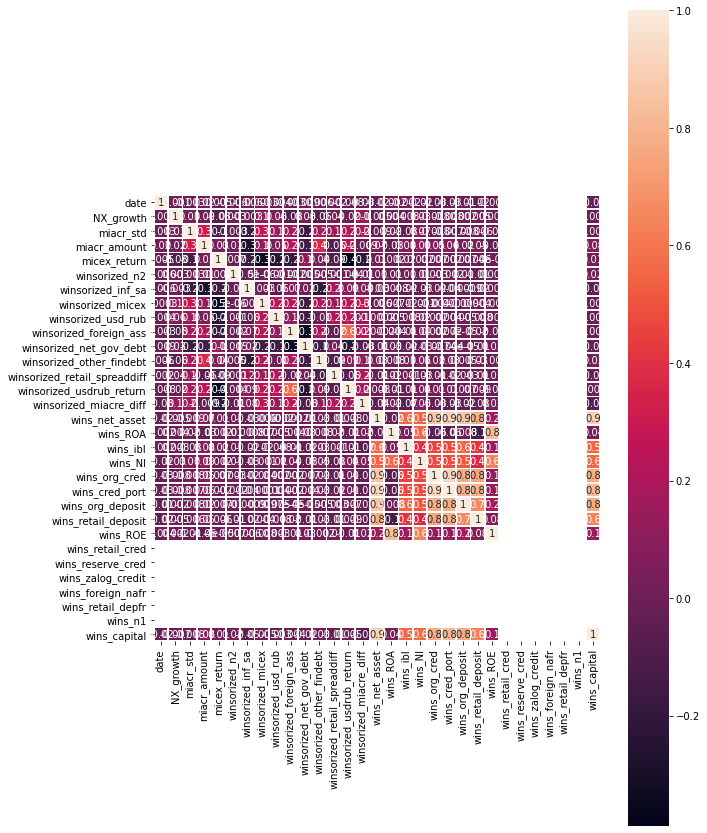

In [188]:
plt.subplots(figsize=(10,15)) 

sns.heatmap(russbank_df.corr(), annot = True, linewidths=.8, square=True, fmt='.1g')

Look at the correlation between net assets and our other three variables in a scatter plot

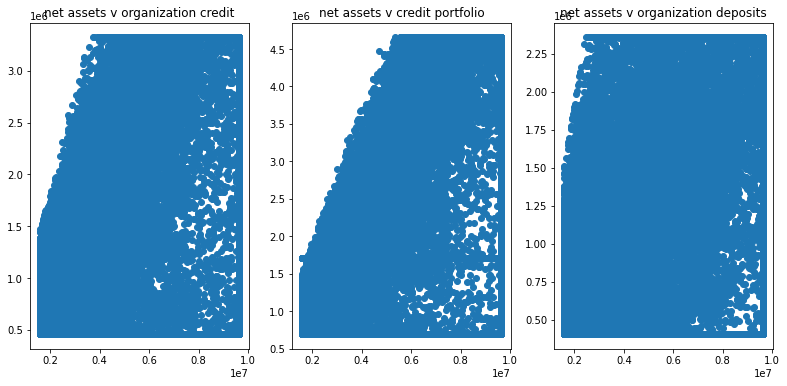

In [189]:
plt.figure(figsize=(18,6))

plt.subplot(1,4,1) 
plt.scatter(russbank_df["wins_net_asset"], russbank_df['wins_org_cred'])
plt.title("net assets v organization credit")

plt.subplot(1,4,2)
plt.scatter(russbank_df["wins_net_asset"], russbank_df['wins_cred_port'])
plt.title("net assets v credit portfolio")

plt.subplot(1,4,3)
plt.scatter(russbank_df["wins_net_asset"], russbank_df["wins_org_deposit"])
plt.title("net assets v organization deposits")

plt.show()

Again we can see a strong positive relationship here

Modeling Phase


> Supervised Learning: Begin with our OLS linear regression model


> Start by creating our X and Y variable





In [190]:
X = russbank_df[['wins_org_cred', 'wins_cred_port', "wins_org_deposit"]] 
Y = russbank_df.wins_net_asset

Build our OLS model and add a constant to the X

In [191]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

print(results.summary())

lrm = linear_model.LinearRegression()

# estimating the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

                            OLS Regression Results                            
Dep. Variable:         wins_net_asset   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 1.775e+05
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:19:46   Log-Likelihood:            -1.1167e+06
No. Observations:               72439   AIC:                         2.233e+06
Df Residuals:                   72435   BIC:                         2.233e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.079e+05   8234.095  

This model looks to be performing very well with 0 p values and a perfect generalization gap as well as low AIC/BIC

Our equation is as follows:

Net assetsY = 0 -.04organizational credit + 1.28credit portfolio + 1.5organizational deposit + e


> Split the data into test and train sets



In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 57951
The number of observations in test set is 14488


Add a constant to our X_train and train the OLS model on our training data

In [193]:
X_train = sm.add_constant(X_train)

In [194]:
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         wins_net_asset   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 1.415e+05
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:20:01   Log-Likelihood:            -8.9342e+05
No. Observations:               57951   AIC:                         1.787e+06
Df Residuals:                   57947   BIC:                         1.787e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.101e+05   9204.642  

There is no change between running the model on our training data and test data versus what we ran before, the figures are still the same with regard to p value and low AIC/BIC

Make predictions on the X train and X test samples

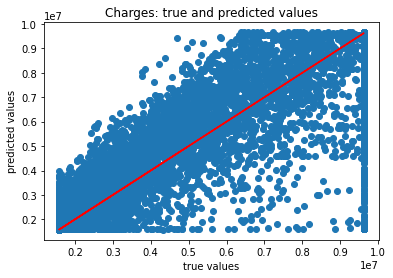

R-squared of the model in training set is: 0.8799069848790653
-----Test set statistics-----
R-squared of the model in test set is: 0.8815511268886298
Mean absolute error of the prediction is: 640369.8758032839
Mean squared error of the prediction is: 1418527924185.9907
Root mean squared error of the prediction is: 1191019.6993274253
Mean absolute percentage error of the prediction is: 15.3847527310831


In [195]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

We see an excellent generalization gap of R^2 for the train at 0.87 and for the test at 0.88. However, our error scores are extremely high, and we can see the data is not fitting tightly to our prediction line, therefore our model is predicting with a significant number of errors, this is largely because we have so much data.

Let's impliment a few additional linear models such as Lasso, Ridge, and ElasticNet to see if they perform any better
Beginning with Lasso

In [196]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**7) 
lassoregr.fit(X_train, y_train)


y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.879907939371886
-----Test set statistics-----
R-squared of the model on the test set is: 0.8815425184866839
Mean absolute error of the prediction is: 640793.0632208904
Mean squared error of the prediction is: 1418631017260.854
Root mean squared error of the prediction is: 1191062.977873485
Mean absolute percentage error of the prediction is: 15.408740659361566


 We see similar results as OLS but with a better generalization gap and much higher MAPE score


> Ridge Model



In [197]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**5) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.8799079395205376
-----Test set statistics-----
R-squared of the model on the test set is: 0.8815425286875632
Mean absolute error of the prediction is: 640790.512377056
Mean squared error of the prediction is: 1418630895096.4788
Root mean squared error of the prediction is: 1191062.9265897241
Mean absolute percentage error of the prediction is: 15.408599341866733


Similar gap and error scores as above



> ElasticNet Model



In [198]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**7, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

#compare these together see which one has lower errors and chose that because the dataset is so big
#you can't say the error scores are too large

R-squared of the model on the training set is: 0.8799079394091144
-----Test set statistics-----
R-squared of the model on the test set is: 0.8815425036858141
Mean absolute error of the prediction is: 640794.7230256788
Mean squared error of the prediction is: 1418631194514.0945
Root mean squared error of the prediction is: 1191063.0522831671
Mean absolute percentage error of the prediction is: 15.40879613705613


Performance did not change between ridge, lasso, OLS, and elasticnet.

Let's apply Random Forest supervised learning model.

Random Forest Model

In [199]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=6,
    random_state = 1337
)

In [200]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestRegressor()
rfc.fit(X_train,y_train)

cross_val_score(rfc, X_train, y_train, cv=5)

array([0.89741842, 0.8994129 , 0.90628099, 0.90500278, 0.90563312])

We can see the random forest model performs well given how tight the discrepency is between the array figures, 89:90, however, it is only performing marginally better than our linear regression models.

In [201]:
rfc.score(X_test, y_test)

0.9067042099536387

In [202]:
cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.9025622274534417

The random forest model performed well out of all the supervised linear regression models so far, and we can see an rfc score of 90 on the test data and a mean of 90 on the train as well

We can see the rfc model on its' first run performs extremely well given that all scores in the array are 89:90 and also the rfc test score is 90, and the mean cross valuation score is 90 as well, toward the end of my project this might be my choice model. 

Note, i did try tweaking the perameters inside the decision tree, but no changes occurred within the scores. Finally, this model performs better than our OLS model, Ridge, Lasso, and ElasticNet, which all had poor generalization gaps and high MAPE scores.

Unsupervised Learning Model Phase

We will not need to encode any of our variables as they are all floats

Let's begin with a few clustering algorithms, starting with K-Means

First we standardize the data and fit the model

In [203]:
from sklearn.cluster import KMeans #k-means model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [204]:
scaler = StandardScaler()
X_std = scaler.fit_transform(russbank_df)

In [205]:
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
pred = k_means.predict(X_std)

1 loop, best of 3: 1.23 s per loop


Minimize variance with PCA and plot the clusters

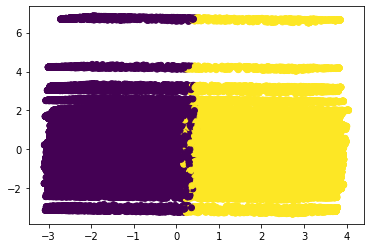

In [208]:
pca = PCA(n_components=2).fit_transform(X_std) 

plt.scatter(pca[:, 0], pca[:, 1], c=pred)
plt.show()

There is a little bit of overlap between the two samples but the definition is quite good


> Try mini batch k-means



In [209]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(X_std)
pred_mini = mini_batch_k_means.predict(X_std)

1 loop, best of 3: 352 ms per loop


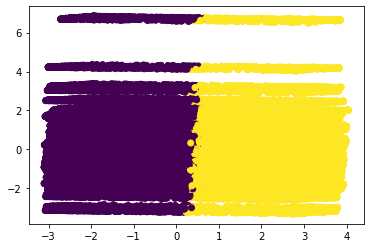

In [210]:
pca = PCA(n_components=2).fit_transform(X_std) 

plt.scatter(pca[:,0], pca[:,1], c=pred_mini)
plt.show()

Same result, this model performed quite well. With no Y variable/ground truth this data performs well in an unsupervised setting. For the sake of thoroughness let me apply a silhouette score to determine how well the k-means model can predict on the data

In [211]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_4, metric='euclidean')))

#chose the best for unsupervised learning, this will be clusters 2, go back and change your cluster analysis

Silhouette score for two cluster k-means: 0.1981115620403515
Silhouette score for three cluster k-means: 0.17469737966375493
Silhouette score for four cluster k-means: 0.11545298385981827


I tried adjusting the number of clusters to 6,7,8 and the silhouette dropped all the way to 10. 


> Perform cluster analysis



In [212]:
russbank_df['predict_clusters'] = pred_2

In [213]:
print(russbank_df['predict_clusters'])

0        0
1        0
2        0
3        0
4        0
        ..
72434    0
72435    0
72436    0
72437    0
72438    0
Name: predict_clusters, Length: 72439, dtype: int32


In [214]:
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

russbank_df.groupby('predict_clusters').describe()

date                                                 \
                    count         mean       std     min     25%     50%   
predict_clusters                                                           
0                 41476.0  2013.391050  2.085411  2010.0  2012.0  2013.0   
1                 30963.0  2013.292056  2.111776  2010.0  2012.0  2013.0   

                                 NX_growth                                  \
                     75%     max     count       mean          std     min   
predict_clusters                                                             
0                 2015.0  2017.0   41476.0   2.582506  2375.306067 -6302.0   
1                 2015.0  2017.0   30963.0 -14.052676  2365.023268 -6302.0   

                                               miacr_std                      \
                     25%   50%     75%     max     count      mean       std   
predict_clusters                                                               
0                -1598.0 -33.0  1667.0  7322.0   41476.0  0.384483  0.663529   
1                -1598.0   9.0  1667.0  7322.0   30963.0  0.376514  0.652306   

                                                                    \
                       min       25%       50%       75%       max   
predict_clusters                                                     
0                 0.037417  0.163503  0.304343  0.409925  5.622167   
1                 0.037417  0.162140  0.285081  0.406482  5.622167   

                 miacr_amount                                         \
                        count          mean           std        min   
predict_clusters                                                       
0                     41476.0  4.056895e+06  1.335814e+06  1284605.0   
1                     30963.0  4.238910e+06  1.347063e+06  1284605.0   

                                                             micex_return  \
                        25%        50%        75%        max        count   
predict_clusters                                                            
0                 2947915.0  3954403.0  4839673.0  8009028.0      41476.0   
1                 3206873.0  4057392.0  5025998.0  8009028.0      30963.0   

                                                                              \
                      mean       std       min       25%       50%       75%   
predict_clusters                                                               
0                 0.004367  0.044712 -0.115092 -0.024347  0.010585  0.039273   
1                 0.005284  0.043701 -0.115092 -0.022155  0.008061  0.039273   

                           winsorized_n2                                      \
                       max         count          mean           std     min   
predict_clusters                                                               
0                 0.107197       41476.0  11494.335886  6.977927e+03  9915.0   
1                 0.107197       30963.0  67263.588847  2.343000e+06  9915.0   

                                                       winsorized_inf_sa  \
                     25%     50%     75%           max             count   
predict_clusters                                                           
0                 9915.0  9915.0  9915.0  4.484721e+05           41476.0   
1                 9915.0  9915.0  9915.0  1.000000e+08           30963.0   

                                                                              \
                      mean       std       min       25%       50%       75%   
predict_clusters                                                               
0                 0.011174  0.004737  0.004761  0.006469  0.011493  0.016451   
1                 0.010818  0.004734  0.004761  0.005646  0.010407  0.015770   

                           winsorized_micex                                  \
                       max            count       mean        std       min   
predict_

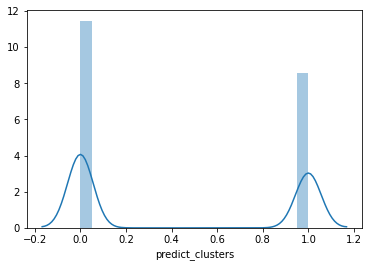

In [215]:
ax = sns.distplot(russbank_df['predict_clusters'], bins=20)

We can see that the values are greater in sample 0 but the based on the figures below the variables with the greatest discprepency show higher values in sample 1. Again i need to emphasize that this model does not perform very well, but I did want to include a cluster analysis regardless. 


Cluster evaluation: The variables that demonstrate the largest value gap are as follows

Variables with the greatest mean difference from 0 to 1 sample:

Return on equity 0: 492 and 1: 582

Net income 0: 10,963 and 1: 28,782

Interest bearing liabilities 0: 163,893 and 1: 397,336

N2 Russian bank ranking 0: 11,494 and 0: 67,263

NX growth within Russian stock market 0: 2.5 and 1: -14

We can surmize that with the exception of NX growth, all the features in sample 1 show the highest increase in debt or other negative growth indicators as compared to sample 0.

Therefore those banks in sample 1 are more likely to go bankrupt than those in sample 0, the debt comparison is too great. 

Evaluation: We can see the clustering results are somewhat poor, and the 2 cluster sample is the best given our silhouette score performs quite well, showing decent density in our datapoints. 



Let's explore one more clustering model to compare this to




GMM Clustering

In [216]:
from matplotlib.patches import Ellipse #clustering with GMM model (gaussan mixture model)
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=2).fit_transform(X_std) #minimize variance with PCA

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123) #consider using elbow method to strengthen choice of 
#number clusters 2

# Fit model
clus = gmm_cluster.fit_predict(X_std)

In [217]:
print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, clus, metric='euclidean')))

Silhouette score: 0.03480137660029097


We see a very poor silhouette score, our k means model performed much better, therefore i would choose k means as the best unsupervised modeling option.

Deep Learning Model Phase

In [218]:
!pip install tensorflow==2.0.0-rc1

import pandas as pd
from tensorflow.keras.models import Sequential 

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

Apply Keras and Neuron Count Variations


Then


Define our tensorflow model using keras with 32 and 16 neurons on two layers plus relu activation function

In [231]:
model = Sequential()
model.add(Dense(500, input_dim=4, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

Compile the tensorflow model using cross entropy for the loss function, we want to use the following perameters when working on a regression problem

In [232]:

model.compile(optimizer='adam', loss= "mean_squared_error", 
              metrics=['mean_squared_error'])

We'll train the model, setting verbose=1 then print out some results after each epoch

In [233]:
model.fit(X_train, y_train, epochs=20, verbose=1)

Train on 57951 samples
Epoch 1/20
57951/57951 [==============================] - 5s 84us/sample - loss: 1380691645238.7905 - mean_squared_error: 1380692000768.0000
Epoch 2/20
57951/57951 [==============================] - 5s 81us/sample - loss: 1239218282338.0999 - mean_squared_error: 1239218257920.0000
Epoch 3/20
57951/57951 [==============================] - 5s 81us/sample - loss: 1236518297733.3032 - mean_squared_error: 1236517388288.0000
Epoch 4/20
57951/57951 [==============================] - 5s 84us/sample - loss: 1225443626792.9197 - mean_squared_error: 1225444556800.0000
Epoch 5/20
57951/57951 [==============================] - 5s 80us/sample - loss: 1228757501313.6499 - mean_squared_error: 1228757270528.0000
Epoch 6/20
57951/57951 [==============================] - 5s 80us/sample - loss: 1218611014122.1333 - mean_squared_error: 1218610593792.0000
Epoch 7/20
57951/57951 [==============================] - 5s 81us/sample - loss: 1216267614838.9993 - mean_squared_error: 121626925

We see a very high MSE here, and performs very poorly compared to the other supervised options even after altering the number of neurons within my layers, I also tried running only one layer and found the result to be similar if not worse.

Results: 

I chose the Random Forest Model for this project, the rfc score was 90 on the train data and the mean cross val score was 90 on the test data, which means this model was well trained and predicted with consistency when i filtered the test data through the algorithm. This model performed much better than its' other supervised counterparts, where lasso, ridge, and elasticnet performed in the 87 range, and our deep learning model had an incredibly high mean squared error of 1,194,943,184,896 (1.2 trillion). Additionally, i wanted to make note that the other error terms in our linear regression models were high as well, hovering around an average of 1 million, however, because the dataset is so large we can't necessarily judge this number as too high. 

Discussion:

This project addressed bankrupt financial institutions in Russia between 2008 and 2014. I evaluated data including macroeconomic indicators such as stock and bond prices, Ruble to USD currency value, and profit and loss figures as well. After modeling the data using trained and untrained algorithms, i was able to gain more insight into why these select banks failed. Using net assets as a measure against other debt variables i was able to confirm that these banks had liabilities exceeding assets. Therefore leading to a scenario of bankruptsy once the market crashed in 2008-2009, as these banks had little to no real capital cushion to absorb the economic crisis. Going forward I would recommend banks retain more cash capital to cover liabilities in the immediate term should another economic downturn occur, and have less dependance on debt investments as a means to keep the financial institution alive. 


